In [1]:
from giskard.ml_worker.testing.stat_utils import equivalence_t_test, paired_t_test
from giskard.ml_worker.testing.stat_utils import equivalence_wilcoxon, paired_wilcoxon 
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, includue:
%matplotlib inline
import scipy.stats as stats

In [2]:
cases={"Invariant":{'loc_pop': 0.5, 'scale_pop': 0.5, 'loc_perturb': 0, 'scale_perturb': 1e-2, 'direction':'Invariant'},
      "Increasing":{'loc_pop': 0.5, 'scale_pop': 0.5, 'loc_perturb': 0.1, 'scale_perturb': 1e-1, 'direction':'Increasing'},
      "Decreasing":{'loc_pop': 0.5, 'scale_pop': 0.5, 'loc_perturb': -0.1, 'scale_perturb': 1e-1, 'direction':'Decreasing'}}

n=15
threshold=0.05

population={}
perturbation={}

np.random.seed(3)

for key in cases.keys():
    population[key] = np.random.normal(cases[key]['loc_pop'], cases[key]['scale_pop'], size=n)
    perturbation[key] = np.random.normal(cases[key]['loc_perturb'], cases[key]['scale_perturb'], size=n)

not enough evidence to reject null hypothesis


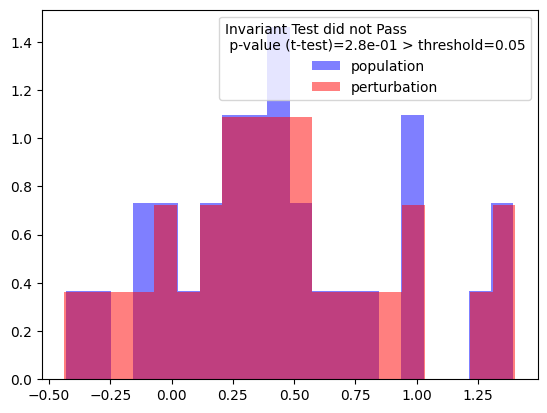

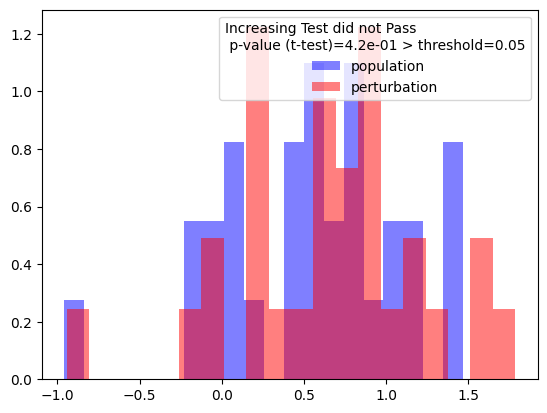

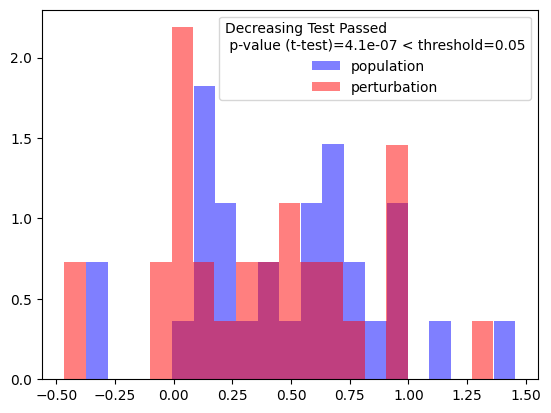

In [3]:
result_inc, p_value_inc = paired_t_test(population["Increasing"], population[key]+perturbation["Increasing"], alternative="less")
result_dec, p_value_dec = paired_t_test(population["Decreasing"], population[key]+perturbation["Decreasing"], alternative="greater")
result_inv, p_value_inv = equivalence_t_test(population["Invariant"], population[key]+perturbation["Invariant"])

dict_mapping_t_test = {'Invariant':  (result_inv, p_value_inv),
                'Decreasing': (result_dec, p_value_dec),
                'Increasing': (result_inc, p_value_inc)}

for key in cases.keys():
    
    plt.hist(population[key], 20,
             density=True,
             histtype='bar',
             facecolor='b',
             alpha=0.5,
            label="population")

    plt.hist(population[key]+perturbation[key], 20,
             density=True,
             histtype='bar',
             facecolor='r',
             alpha=0.5,
            label="perturbation")

    status=key+" "
    if dict_mapping_t_test[key][1] < 0.05:
        status+="Test Passed"
        comp=" < "
    else:
        status+="Test did not Pass"
        comp=" > "


    plt.legend(title=status+"\n p-value (t-test)="+str("{:.1e}".format(dict_mapping_t_test[key][1]))+comp+"threshold="+str(threshold))
    plt.show()
    
    
    #if p_value < critical_quantile ==> null cannot be rejected 


not enough evidence to reject null hypothesis


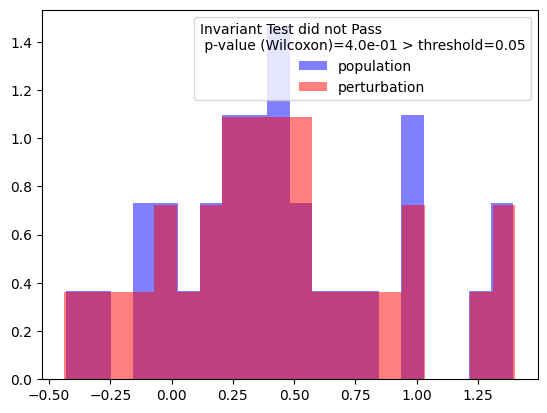

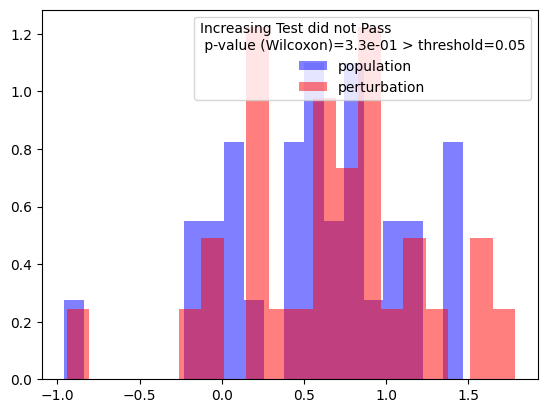

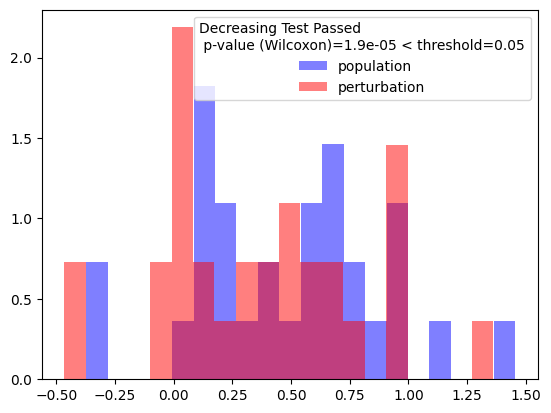

In [4]:
threshold=0.05


result_inc, p_value_inc = paired_wilcoxon(population["Increasing"], population[key]+perturbation["Increasing"], alternative="less")
result_dec, p_value_dec = paired_wilcoxon(population["Decreasing"], population[key]+perturbation["Decreasing"], alternative="greater")
result_inv, p_value_inv = equivalence_wilcoxon(population["Invariant"], population[key]+perturbation["Invariant"])

dict_mapping_wilcoxon = {'Invariant':  (result_inv, p_value_inv),
                'Decreasing': (result_dec, p_value_dec),
                'Increasing': (result_inc, p_value_inc)}

for key in cases.keys():
    
    plt.hist(population[key], 20,
             density=True,
             histtype='bar',
             facecolor='b',
             alpha=0.5,
            label="population")

    plt.hist(population[key]+perturbation[key], 20,
             density=True,
             histtype='bar',
             facecolor='r',
             alpha=0.5,
            label="perturbation")

    status=key+" "
    if dict_mapping_wilcoxon[key][1] < 0.05:
        status+="Test Passed"
        comp=" < "
    else:
        status+="Test did not Pass"
        comp=" > "


    plt.legend(title=status+"\n p-value (Wilcoxon)="+str("{:.1e}".format(dict_mapping_wilcoxon[key][1]))+comp+"threshold="+str(threshold))
    plt.show()
    


# Summary

In [5]:
print("Sample size=",n,"\n")

# Prints the nicely formatted dictionary

print("t-test")
for key in dict_mapping_t_test.keys():
    print(dict_mapping_t_test[key][0], "p-value[",key,"]=",dict_mapping_t_test[key][1])
print()
print("Wilcoxon")
for key in dict_mapping_wilcoxon.keys():
    print(dict_mapping_wilcoxon[key][0], "p-value[",key,"]=",dict_mapping_wilcoxon[key][1])

Sample size= 30 

t-test
False p-value[ Invariant ]= 0.2826319087341232
True p-value[ Decreasing ]= 4.0602683599443865e-07
False p-value[ Increasing ]= 0.41556736963041396

Wilcoxon
False p-value[ Invariant ]= 0.3985491515033976
True p-value[ Decreasing ]= 1.8621323639728217e-05
False p-value[ Increasing ]= 0.32916526204406704
